# PCA toy

In [142]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Сгенерируем выборку.

In [143]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

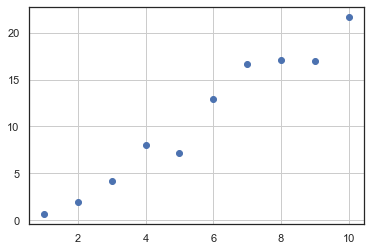

In [146]:
fig, ax = plt.subplots()

# Plot your data
ax.scatter(x=X[0], y=X[1])
ax.grid()

Проецирование на вектор не меняет значения средних. Центрирование выборки, то есть сдвиг ее так, чтобы средние значения признаков были 0, упростит вычисления. Хотя можно обойтись без центрирования. Для восстановления выборки в исходной размерности понадобится оператор, который будет равен вектору изначальных средних значений.

In [147]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]), array([-10.08963045,  -8.71849012,  -6.57255357,  -2.74474283,
        -3.51506321,   2.2121097 ,   5.95097722,   6.31810219,
         6.19979513,  10.95949594]))
Mean vector:  (5.5, 10.726924201099951)


* Дисперсия сильно зависит от порядка значений случайной величины и чувствительна к масштабированию. Поэтому, если единицы измерения признаков имеют существенные различия в своих порядках, рекомендуется провести стандартизацию. В данном случае различия в порядках значений не настолько значительны, поэтому мы можем опустить этот шаг для упрощения примера.
* **PCA направлен на нахождение направлений, или "основных компонент", которые максимизируют вариативность в данных.** Ковариационная матрица количественно оценивает вариативность данных и их совместную вариативность, или ковариацию, между парами признаков. Вариативность по одному признаку является дисперсией, а взаимосвязь между двумя разными признаками выражается через их ковариацию.
* По сути, ковариационная матрица используется для определения направлений, в которых данные показывают наибольшее различие. Это обеспечивает математическую основу для выделения главных компонент, которые являются ортогональными векторами вдоль этих направлений.

In [148]:
cov = np.cov(X)
print(cov)
print("Variance of X: ",cov[0,0])
print("Variance of Y: ", cov[1,1])
print("Covariance X and Y: ", cov[0,1])

[[ 9.16666667 21.67431923]
 [21.67431923 53.29716014]]
Variance of X:  9.166666666666666
Variance of Y:  53.29716013899076
Covariance X and Y:  21.674319234315643


Теперь нужно найти вектор (в данном случае только один), который бы максимизировал размер (дисперсию) проекции нашей выборки на него.

In [156]:
vals, vecs = np.linalg.eig(cov)
v = -vecs[:,1]

**Диагональные элементы ковариационной матрицы показывают дисперсии по изначальному базису, а ее собственные значения – по новому (по главным компонентам).**

In [158]:
vals

array([ 0.30213442, 62.16169238])

**Направление максимальной дисперсии у проекции всегда совпадает с собственным вектором, имеющим максимальное собственное значение, равное величине этой дисперсии.**

Полученный вектор (или матрица) будет являться массивом проекций наших наблюдений.

In [332]:
Xnew = np.dot(v,Xcentered)
print(Xnew)

[-11.04224407  -9.39459237  -7.02980447  -3.1083068   -3.44274914
   2.23676092   6.07593449   6.79428927   7.06333766  11.84737451]


Если хотим раскодировать данные. 

У нас есть вся необходимая информация, а именно координаты базисных векторов в исходном базисе (векторы, на которые мы проецировали) и вектор средних (для отмены центровки).

In [331]:
n = 9    
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 9.98483659 21.69262179]
Original:  [0.4105985  0.85475294]


Используем sklearn. Параметр **n_components** определяет количество измерений, на которые будет произведена проекция датасета. Это количество соответствует числу самых важных собственных векторов. Давайте проверим результат уменьшения размерности:

In [194]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X.T)

In [195]:
print('Our reduced X: \n', Xnew)
print('Sklearn reduced X: \n', XPCAreduced)

Our reduced X: 
 [-11.04224407  -9.39459237  -7.02980447  -3.1083068   -3.44274914
   2.23676092   6.07593449   6.79428927   7.06333766  11.84737451]
Sklearn reduced X: 
 [[-11.04224407]
 [ -9.39459237]
 [ -7.02980447]
 [ -3.1083068 ]
 [ -3.44274914]
 [  2.23676092]
 [  6.07593449]
 [  6.79428927]
 [  7.06333766]
 [ 11.84737451]]


In [197]:
print('Mean vector: ', pca.mean_, m)
print('Projection: ', pca.components_, v)
print('Explained variance ratio: ', pca.explained_variance_, vals[1])
print('Explained variance ratio: ', pca.explained_variance_ratio_, vals[1]/sum(vals))



Mean vector:  [ 5.5       10.7269242] (5.5, 10.726924201099951)
Projection:  [[0.37855109 0.9255804 ]] [0.37855109 0.9255804 ]
Explained variance ratio:  [62.16169238] 62.16169238358987
Explained variance ratio:  [0.99516305] 0.9951630497598621


Нужно помнить, что PCA ищет линейные зависимости. Он вычисляет ортогональные линейные комбинации исходных переменных, которые максимизируют вариативность в данных. Эти линейные комбинации называются главными компонентами и представляют собой новые оси координат, вдоль которых данные проецируются. Для исследования нелинейных зависимостей используются другие методы, такие как **Kernel PCA**.

Советую:

[sklearn дока](https://scikit-learn.org/stable/modules/decomposition.html#pca);
[хабр статья](https://habr.com/ru/articles/304214/);
[stack](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

# TruncatedSVD

$$
X = USV^T
$$


Зачем же нужно сингулярное преобразование и как применить его к задаче снижения размерности? Матрица $S$, в центре разложения, является диагональной:

$$
S = 
\left[
\begin{array}{cccccc}
\sigma_1 & 0 & 0 & \ldots & 0 & 0 \\
0 & \sigma_2 & 0 &  \ldots & 0 & 0 \\
0 & 0 & \sigma_3 & \ldots & 0 & 0 \\
\ldots& \ldots& \ldots& \ldots& \ldots & \ldots\\
0 & 0 & \ldots & 0 & 0 & 0 \\
0 & 0 & \ldots & 0 & 0 & 0 \\
\end{array}
\right]
$$

Числа  $\sigma_1, \sigma_2, \ldots \sigma_n$ на главной диагонали расположены по убыванию. Суть SVD состоит в том, что для снижения размерности мы можем оставить как есть числа $\sigma_1, \sigma_2, \ldots, \sigma_k$ до некоторого $k<m$ и приравнять к нулю $\sigma_{k+1}, \sigma_{k+2},\ldots, \sigma_n$.

Столбы в нашей матрицы это и есть фичи, а строки - это объекты в обучающей выборке. Обнуляя элементы в центрально матрице мы как бы обнуляем некоторые фичи у некоторых объектов в исходной матрице, то есть понижаем размерность

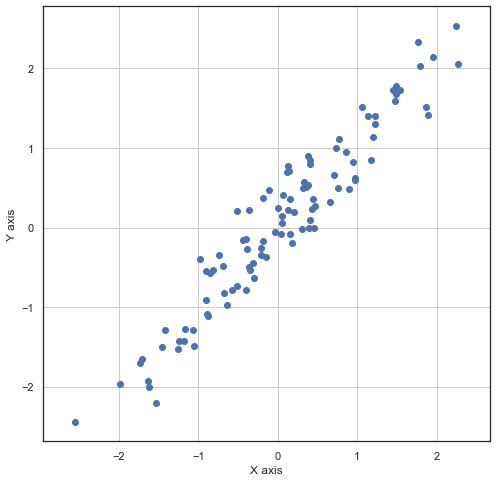

In [304]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 0.3, 100)
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal') 
plt.grid(True)
plt.show()


In [322]:
X = np.vstack((x,y))

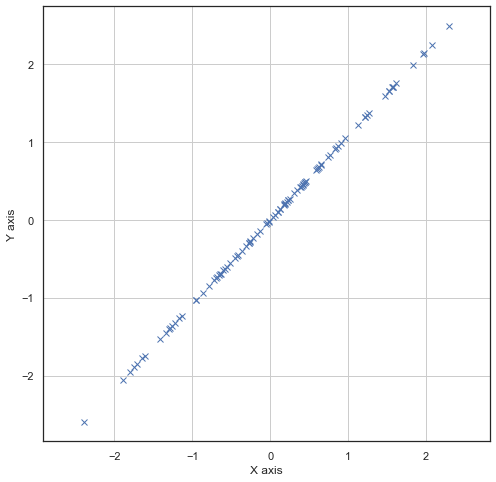

In [329]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=1).fit(X)
X_svd = svd_model.transform(X)
X_svd_restored = svd_model.inverse_transform(X_svd)
plt.figure(figsize=(8, 8))
plt.plot(X_svd_restored[0], X_svd_restored[1], 'x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal') 
plt.grid(True)
plt.show()



# PCA iris

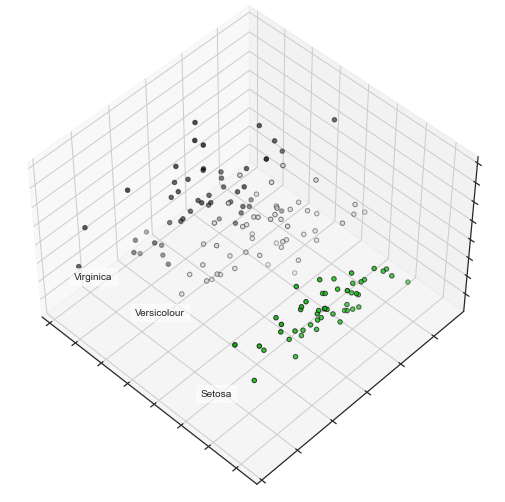

In [206]:
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(7, 7))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


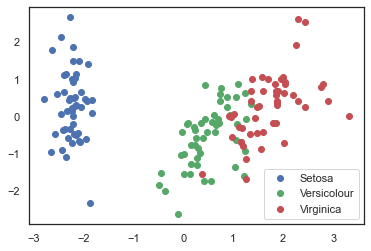

In [217]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Прогоним встроенный в sklearn PCA
pca = PCA(n_components=2)
pca.fit(Xscaled)
X_pca = pca.transform(Xscaled)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);
     

In [218]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


In [220]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 72.96% of initial variance
0.521 x sepal length (cm) + -0.269 x sepal width (cm) + 0.580 x petal length (cm) + 0.565 x petal width (cm)
2 component: 22.85% of initial variance
0.377 x sepal length (cm) + 0.923 x sepal width (cm) + 0.024 x petal length (cm) + 0.067 x petal width (cm)


In [226]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [222]:
v1 = pca.components_[0]

In [223]:
v2 = pca.components_[1]

Ортогональны!

In [225]:
np.dot(v1,v2)

-7.000906105809701e-16

# Face dataset

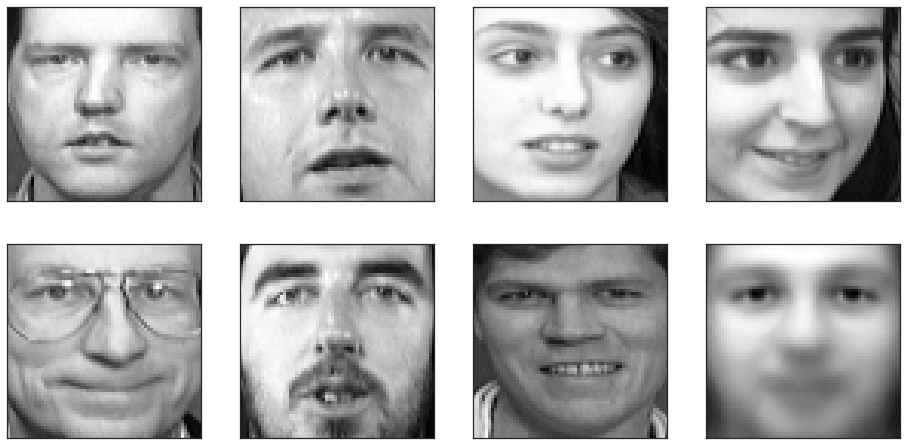

In [333]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=432542)
faces_images = faces.data
faces_ids = faces.target
image_shape = (64, 64)
    
mean_face = faces_images.mean(axis=0)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples - 1):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(faces_images[i, :].reshape(image_shape), interpolation='none',
               cmap='gray')
    plt.xticks(())
    plt.yticks(())
    
plt.subplot(rows, cols, n_samples)
plt.imshow(mean_face.reshape(image_shape), interpolation='none',
           cmap='gray')
plt.xticks(())
_ = plt.yticks(())

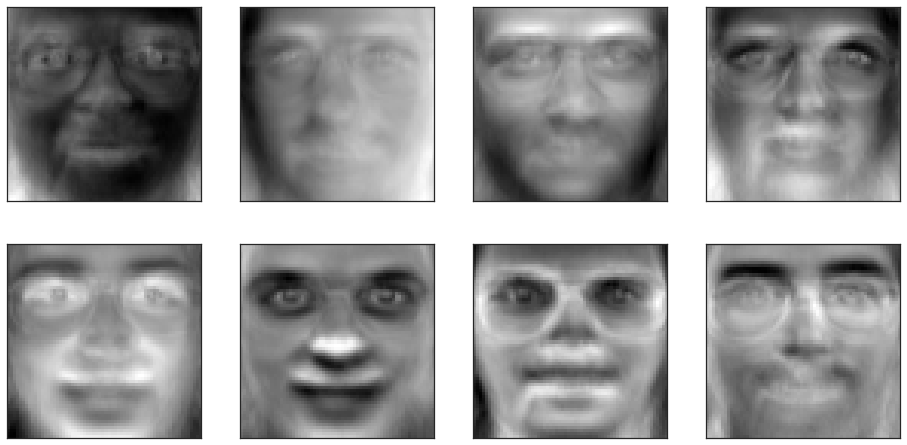

In [334]:
model_pca = PCA(n_components=100)
faces_images -= mean_face  # отнормировали данные к нулевому среднему
model_pca.fit(faces_images)

plt.figure(figsize=(16, 8))
rows, cols = 2, 4
n_samples = rows * cols
for i in range(n_samples):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(model_pca.components_[i, :].reshape(image_shape), interpolation='none', cmap='gray')
    plt.xticks(())
    plt.yticks(())

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

gscv_rf = GridSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [100, 200], 'max_depth': [2, 3]}, cv=3
)

In [336]:
%%time
gscv_rf.fit(faces_images, faces_ids)
print(gscv_rf.best_score_)

0.5723076347585381
CPU times: user 4.5 s, sys: 48.8 ms, total: 4.55 s
Wall time: 4.55 s


Использовали PCA, убрали шум, качество выросло.

In [337]:
%%time
gscv_rf.fit(model_pca.transform(faces_images), faces_ids)
print(gscv_rf.best_score_)

0.7197471290165712
CPU times: user 2.11 s, sys: 2.04 s, total: 4.14 s
Wall time: 1.73 s


Так же главные компоненты можно использовать для компактного хранения данных. Для этого объекты трансформируются в новое пространство, и из него выкидываются самые незначимые признаки. Ниже приведены результаты сжатия в 20 раз (а затем воссстановления).

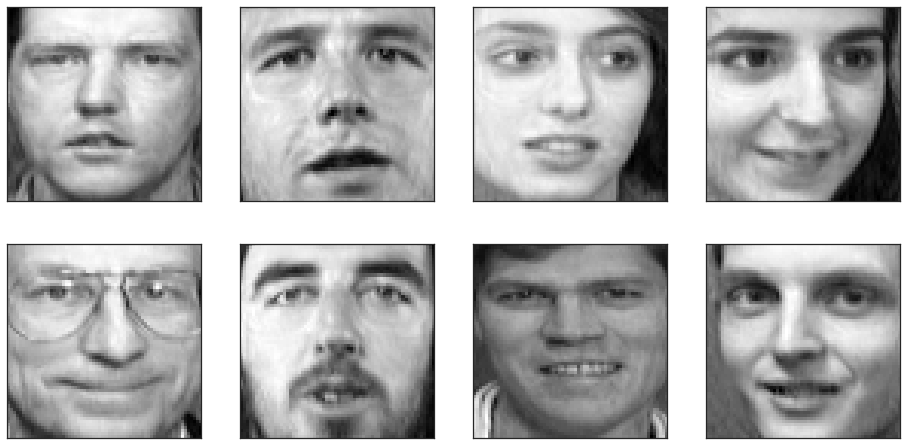

In [338]:
base_size = image_shape[0] * image_shape[1]

def compress_and_show(compress_ratio):
    model_pca = PCA(n_components=int(base_size * compress_ratio))
    model_pca.fit(faces_images)

    faces_compressed = model_pca.transform(faces_images)
    
    # обратное преобразование
    faces_restored = model_pca.inverse_transform(faces_compressed) + mean_face

    plt.figure(figsize=(16, 8))
    rows, cols = 2, 4
    n_samples = rows * cols
    for i in range(n_samples):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(faces_restored[i, :].reshape(image_shape), interpolation='none',
                   cmap='gray')
        plt.xticks(())
        plt.yticks(())
        
compress_and_show(0.05)

Даже при восстановлении после сжатия в 20 раз получаются очень похожие лица.

# Digits

Вообще можно использовать MNIST, но на нем долго будет считаться. Если хотите попробовать визуализации на полном датасете Mnist, используйте:

`from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")`

In [244]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [245]:
X.shape

(1797, 64)

Визуализируем.

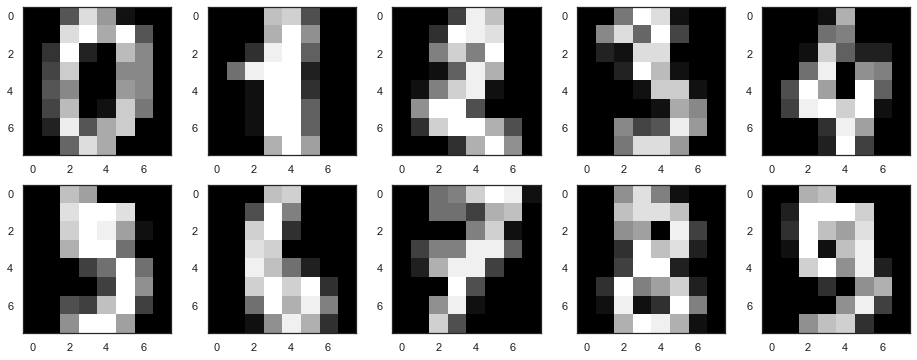

In [255]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))
     

Projecting 64-dimensional data to 2D


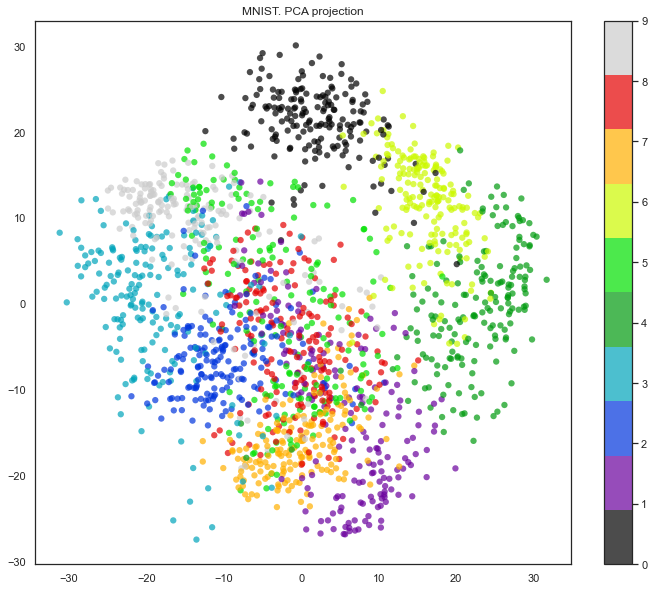

In [251]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')
plt.show()

Если вам не нужная визуализация, но вы хотите использовать PCA для понижения размерности данных. Сколько главных компонент выбрать? Обычно выбирают такое количество, чтобы оставить 90% дисперсии исходных данных. В данном примере это примерно 21. То есть стоит снизить размерность с 64 до 21.

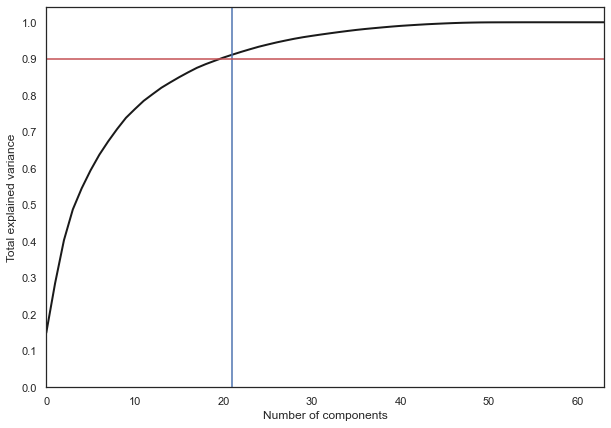

In [257]:
pca = PCA(n_components=64).fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

# tSNE

/Users/mark/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mark/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 18.2 s, sys: 9.24 s, total: 27.5 s
Wall time: 4.85 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

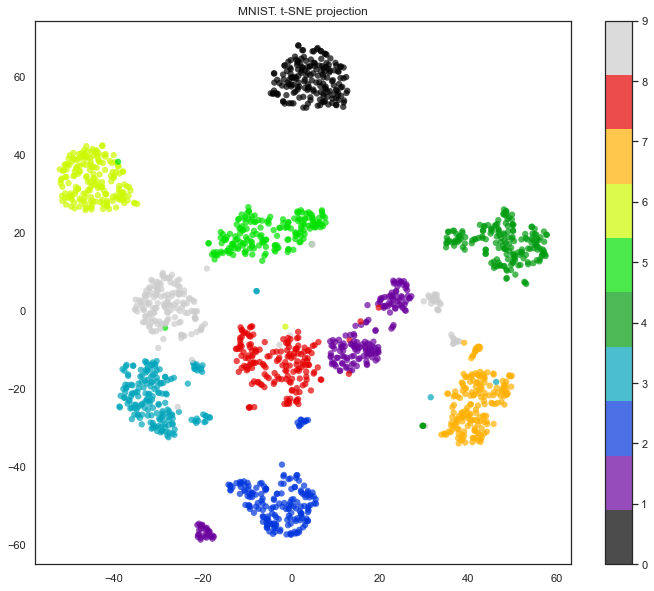

In [115]:

%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')
plt.show()

Получается проекция получше, так как PCA находит только линейные комбинации исходных признаков. У метода есть параметр `perplexity`. Если установить небольшое значение, то алгоритм будет более чувствителен к локальным структурам данных и будет уделять больше внимания ближайшим соседям. Это может привести к тому, что вложение будет сохранять близкие соседи с высокой вероятностью, но может привести к искажению глобальных структур данных. Если установить значение побольше, то алгоритм будет более сглаживать локальные структуры данных и уделять больше внимания глобальным структурам. Это может помочь воссоздать общую структуру данных, но может потерять некоторые детали и локальные особенности.


/Users/mark/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mark/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 16.8 s, sys: 8.58 s, total: 25.4 s
Wall time: 4.19 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

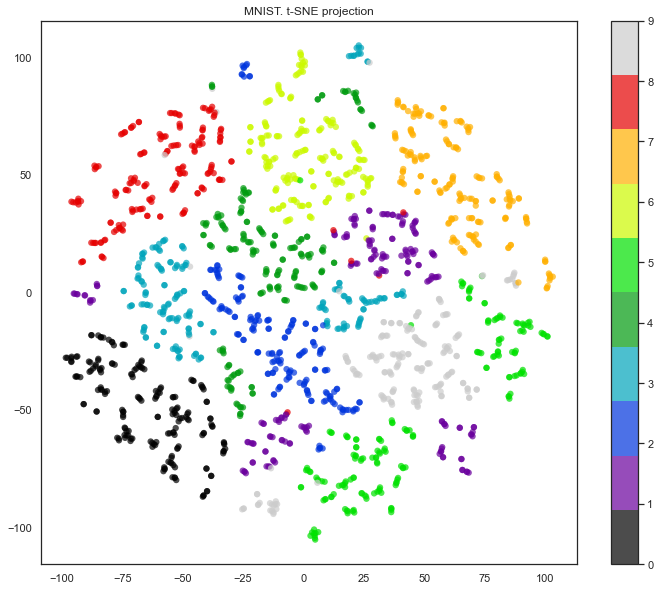

In [267]:
%%time
tsne = TSNE(perplexity=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.title('MNIST. t-SNE projection');

[Статья, Hinton, 2008](https://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

* t-SNE может быть нестабильным
* Размеры полученных сгустков могут ничего не значить
* Расстояния между кластерами могут ничего не значить
* Полностью шумовые данные могут выдать структуру

# UMAP

Установим библиотеку. У UMAP на самом деле есть несколько реализаций.

In [258]:
#%pip install umap-learn

In [259]:
import umap

На таком небольшом примере UMAP работает всего в 2 раза быстрее tSNE. На более показательных датасетах - MNIST с 70000 примерами и 784 фичами, UMAP будет показывать существенное различие в скорости.

In [260]:
%%time
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

/Users/mark/Library/Python/3.8/lib/python/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 2.62 s, sys: 62 ms, total: 2.68 s
Wall time: 2.47 s


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [261]:
embedding = reducer.transform(digits.data)
embedding.shape

(1797, 2)

Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

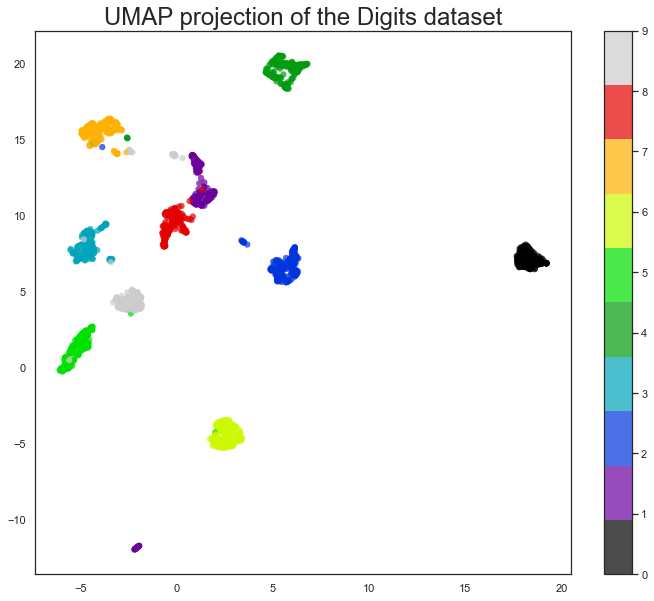

In [262]:
plt.figure(figsize=(12,10))
plt.scatter(embedding[:, 0], embedding[:, 1],c=y, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('UMAP projection of the Digits dataset', fontsize=24)

Очень классная статья про [UMAP](https://pair-code.github.io/understanding-umap/).